In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Weather Data.csv')

- You can find the number of records (rows) and features (columns) in the dataset using the (.shape) attribute which gives the number of rows
and columns.

In [3]:
num_records, num_features = data.shape

print(f"Number of records: {num_records}")
print(f"Number of features: {num_features}")

Number of records: 8784
Number of features: 8


- To find the data types of each feature (column) and additional information, you use the (.info) attribute.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


- To identify misssing values you use the (.isna()) attribute and it seems there are no missing values in our dataset

In [6]:
data.isna().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

- To check for duplicates you use the (.duplicated) attribute. There were no duplicates in the dataset.

In [7]:
duplicates = data.duplicated()
num_duplicates = duplicates.sum()
print(f"Number of duplicate records: {num_duplicates}")

Number of duplicate records: 0


- To provide a statistical summary of the dataset (mean, median, standard deviation, etc.) for numerical features, you use the 
(.describe()) attribute which gives the count, mean, standard deviation, minimum value, 25th percentile value, median or 50th 
percentile value, 75th percentile value and the maximum value for each column.

In [8]:
summary = data.describe()

print("Statistical Summary:")
print(summary)

Statistical Summary:
            Temp_C  Dew Point Temp_C    Rel Hum_%  Wind Speed_km/h  \
count  8784.000000       8784.000000  8784.000000      8784.000000   
mean      8.798144          2.555294    67.431694        14.945469   
std      11.687883         10.883072    16.918881         8.688696   
min     -23.300000        -28.500000    18.000000         0.000000   
25%       0.100000         -5.900000    56.000000         9.000000   
50%       9.300000          3.300000    68.000000        13.000000   
75%      18.800000         11.800000    81.000000        20.000000   
max      33.000000         24.400000   100.000000        83.000000   

       Visibility_km    Press_kPa  
count    8784.000000  8784.000000  
mean       27.664447   101.051623  
std        12.622688     0.844005  
min         0.200000    97.520000  
25%        24.100000   100.560000  
50%        25.000000   101.070000  
75%        25.000000   101.590000  
max        48.300000   103.650000  


- To find significant data outliers in the data, we will write a function to display them and the call it upon all numeric columns
in our dataset.

In [9]:
def find_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))
    return data[outliers]

for column in data.select_dtypes(include='number').columns:
    outliers = find_outliers_iqr(data[column])
    if not outliers.empty:
        print(f"Outliers in {column}:")
        print(outliers.describe())
        print(outliers)

Outliers in Rel Hum_%:
count     2.0
mean     18.0
std       0.0
min      18.0
25%      18.0
50%      18.0
75%      18.0
max      18.0
Name: Rel Hum_%, dtype: float64
1984    18
3066    18
Name: Rel Hum_%, dtype: int64
Outliers in Wind Speed_km/h:
count    162.000000
mean      42.759259
std        6.647099
min       37.000000
25%       37.000000
50%       41.000000
75%       46.000000
max       83.000000
Name: Wind Speed_km/h, dtype: float64
25      39
32      39
33      44
34      43
36      48
        ..
8679    37
8680    37
8684    37
8749    37
8750    37
Name: Wind Speed_km/h, Length: 162, dtype: int64
Outliers in Visibility_km:
count    3539.000000
mean       32.101837
std        19.033501
min         0.200000
25%        12.900000
50%        48.300000
75%        48.300000
max        48.300000
Name: Visibility_km, dtype: float64
0        8.0
1        8.0
2        4.0
3        4.0
4        4.8
        ... 
8779     9.7
8780     9.7
8781     4.8
8782     9.7
8783    11.3
Name: Visi

## Description of the outliers in the data;
1. Relative Humidity (Rel Hum_%) 
- 2 outliers were detected. The mean value of the outliers is 18%. Both the minimum and maximum values are 18%, indicating that both outliers have the same relative humidity.These outliers are located at indices 1984 and 3066.

2. Wind Speed (Wind Speed_km/h) 
- 162 outliers were detected. The average wind speed among the outliers is approximately 42.76 km/h. The minimum wind speed among outliers is 37 km/h, while the maximum is 83 km/h. The wind speed outliers occur at various indices, including 25, 32, 33, 34, 36, and others, totaling 162 outliers.

3. Visibility (Visibility_km) 
- 3,539 outliers were detected. The average visibility among the outliers is approximately 32.1 km. The minimum visibility in these outliers is 0.2 km, and the maximum is 48.3 km. The outliers are spread throughout the dataset, starting from indices 0, 1, 2, 3, 4, and many more, indicating a substantial portion of the data.

4. Pressure (Press_kPa) 
- 207 outliers were detected. The average pressure among the outliers is approximately 100.58 kPa. The minimum pressure among outliers is 97.52 kPa, and the maximum is 103.65 kPa. The outliers occur at indices like 294, 295, 296, 297, 298, and continue up to a total of 207 outliers.

- To create visualisation to show the distribution of key weather parameters like temperature, humidity and wind speed, you can use various
visualisation eahniques provided in the matplotlib and seaborn libraries. I am goi to use the histogram and Kernel Density Estimate(KDE) line to showcase the estimate of the distribution.

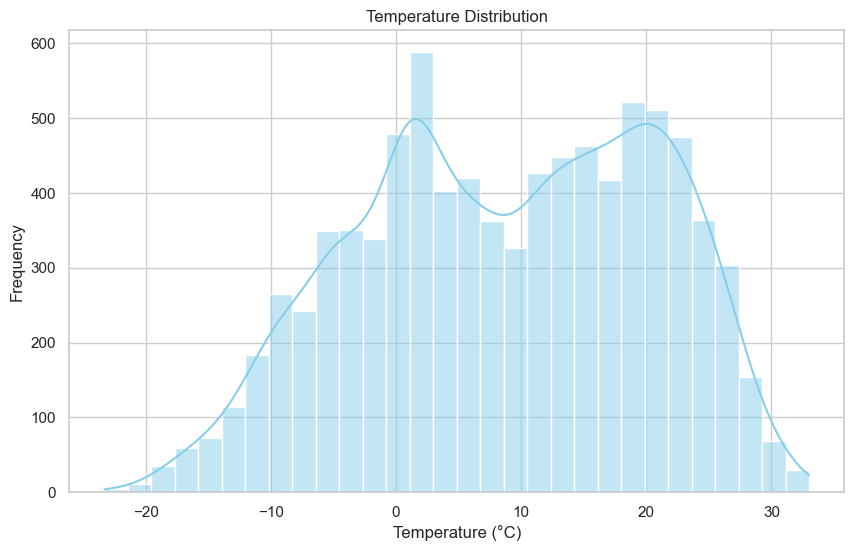

In [11]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data['Temp_C'], kde=True, color='skyblue', bins=30)
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

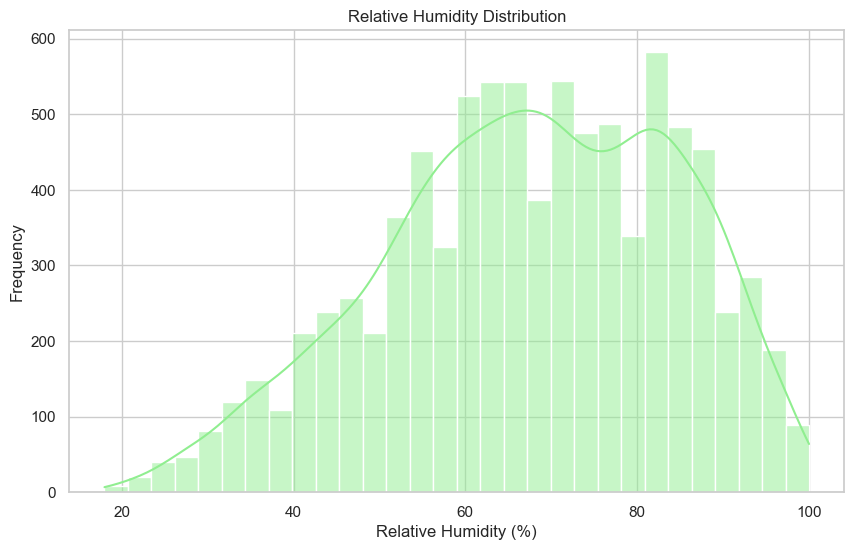

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Rel Hum_%'], kde=True, color='lightgreen', bins=30)
plt.title('Relative Humidity Distribution')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Frequency')
plt.show()

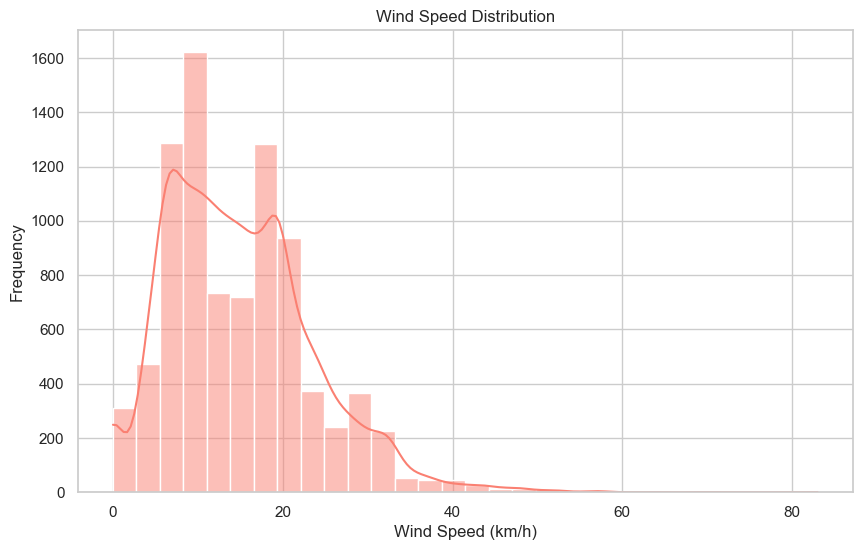

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Wind Speed_km/h'], kde=True, color='salmon', bins=30)
plt.title('Wind Speed Distribution')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Frequency')
plt.show()

- Time series analysis involves plotting data points in time order to identify trends, patterns, or seasonal variations.
Time series plots for key weather parameters like temperature, humidity and wind speed can be plotted with the use of matplotlib and
seaborn libraries.

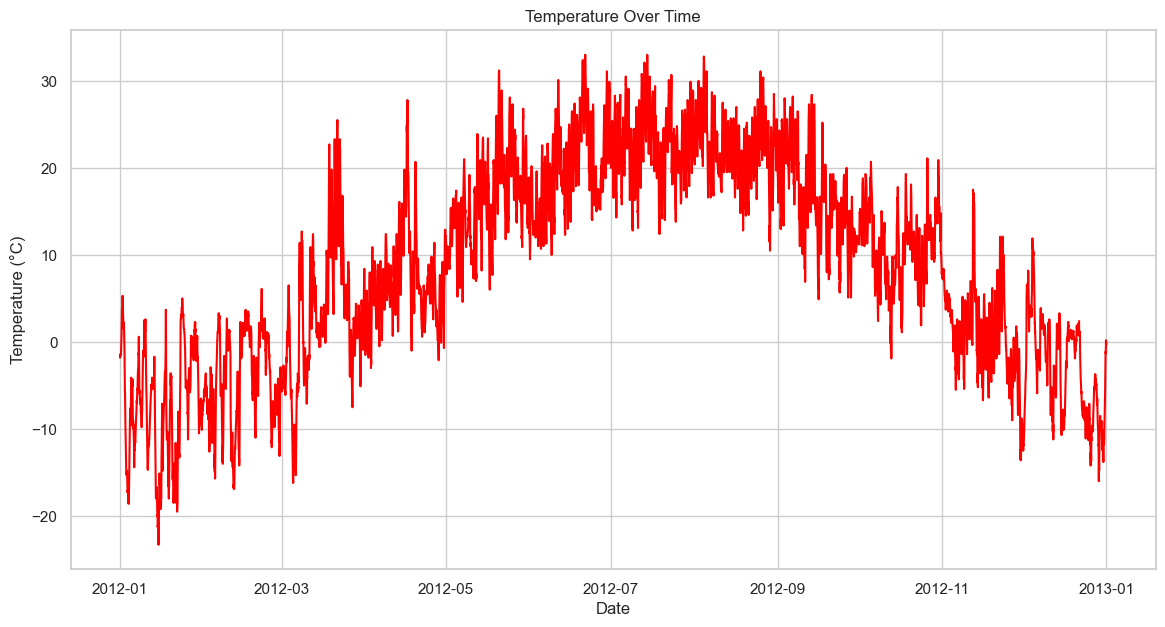

In [14]:
data['Date/Time'] = pd.to_datetime(data['Date/Time'])

plt.figure(figsize=(14, 7))
plt.plot(data['Date/Time'], data['Temp_C'], color='red')
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

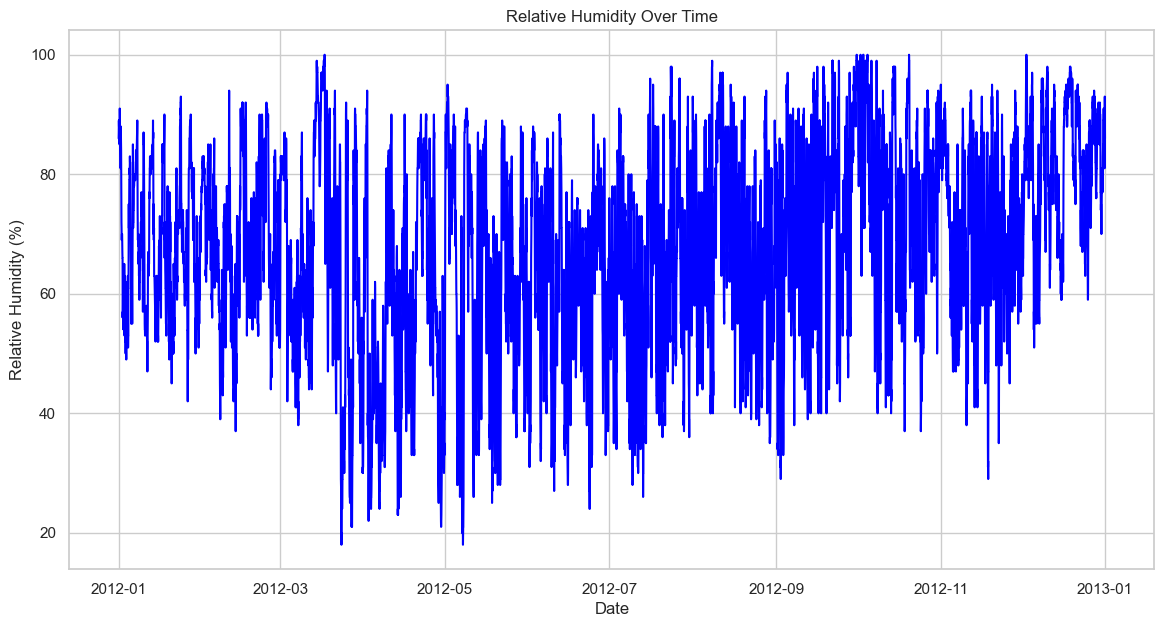

In [16]:
plt.figure(figsize=(14, 7))
plt.plot(data['Date/Time'], data['Rel Hum_%'], color='blue')
plt.title('Relative Humidity Over Time')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (%)')
plt.grid(True)
plt.show()

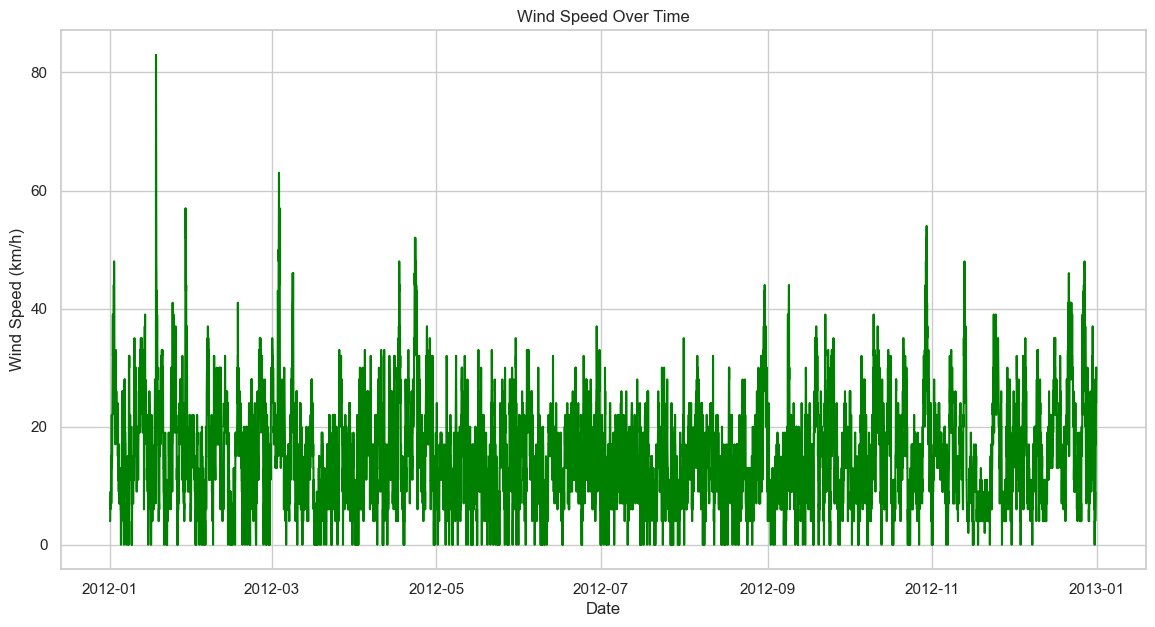

In [17]:
plt.figure(figsize=(14, 7))
plt.plot(data['Date/Time'], data['Wind Speed_km/h'], color='green')
plt.title('Wind Speed Over Time')
plt.xlabel('Date')
plt.ylabel('Wind Speed (km/h)')
plt.grid(True)
plt.show()

- You can also want to plot multiple weather parameters on the same graph to compare trends.

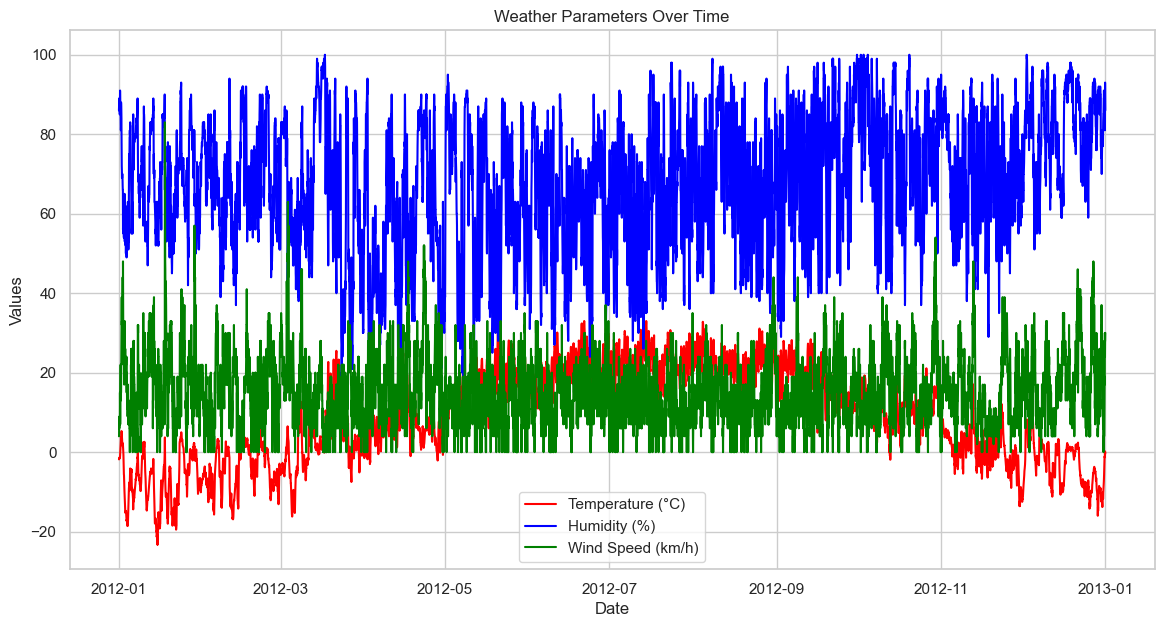

In [18]:
plt.figure(figsize=(14, 7))
plt.plot(data['Date/Time'], data['Temp_C'], label='Temperature (°C)', color='red')
plt.plot(data['Date/Time'], data['Rel Hum_%'], label='Humidity (%)', color='blue')
plt.plot(data['Date/Time'], data['Wind Speed_km/h'], label='Wind Speed (km/h)', color='green')
plt.title('Weather Parameters Over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

- To create correlation matrices and heatmaps to identify relationships between different weather parameters so that we can 
identifying how strongly variables are correlated with each other, we first create a correlation matrix using the (.corr())
attribute then we can plot the heatmap.

In [19]:
data_numeric = data.select_dtypes(include=[float, int])
correlation_matrix = data_numeric.corr()
print(correlation_matrix)

                    Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
Temp_C            1.000000          0.932714  -0.220182        -0.061876   
Dew Point Temp_C  0.932714          1.000000   0.139494        -0.095685   
Rel Hum_%        -0.220182          0.139494   1.000000        -0.092743   
Wind Speed_km/h  -0.061876         -0.095685  -0.092743         1.000000   
Visibility_km     0.273455          0.050813  -0.633683         0.004883   
Press_kPa        -0.236389         -0.320616  -0.231424        -0.356613   

                  Visibility_km  Press_kPa  
Temp_C                 0.273455  -0.236389  
Dew Point Temp_C       0.050813  -0.320616  
Rel Hum_%             -0.633683  -0.231424  
Wind Speed_km/h        0.004883  -0.356613  
Visibility_km          1.000000   0.231847  
Press_kPa              0.231847   1.000000  


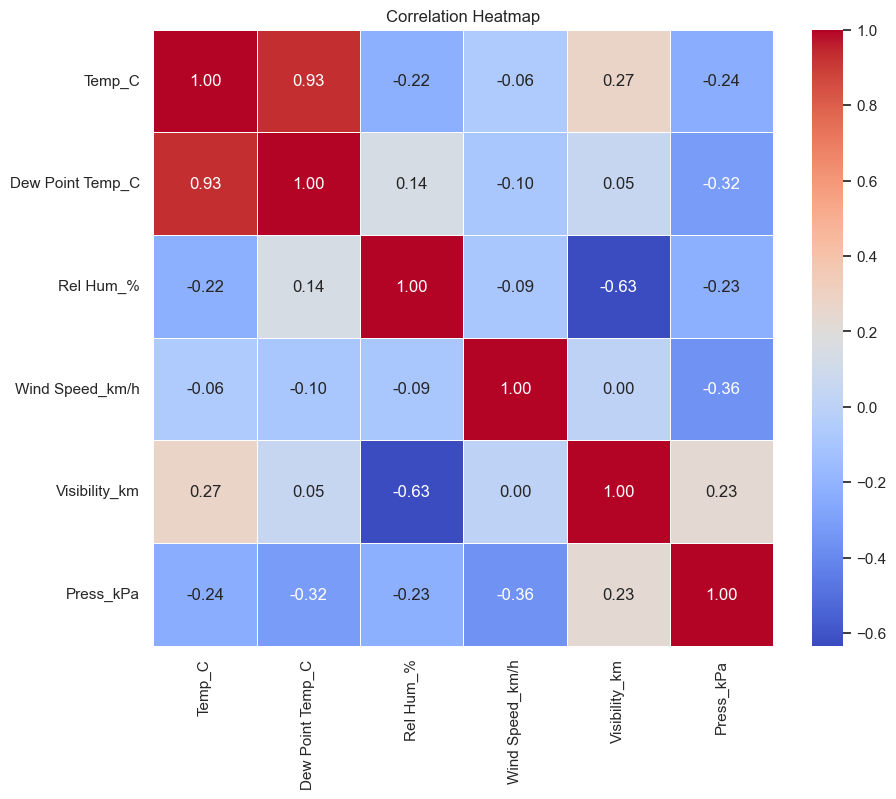

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

- Temperature shows clear seasonal patterns, with peaks in summer and troughs in winter. Transitional seasons like spring and autumn exhibit moderate temperatures while Humidity tends to be higher during warmer months or the rainy season and lower during winter.
- There is a negative correlation between temperature and humidity, especially during summer when high temperatures are 
associated with lower relative humidity.
- These analyses provide a comprehensive view of how weather parameters vary throughout the year, highlighting significant patterns and correlations that could inform further weather modeling or prediction efforts.

- Investigating anomalies in the weather dataset involves identifying data points that deviate significantly from the overall trends or expected behavior.
To find significant data outliers in the data, we will write a function to display them and the call it upon all numeric columns
in our dataset.

In [21]:
def find_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))
    return data[outliers]

for column in data.select_dtypes(include='number').columns:
    outliers = find_outliers_iqr(data[column])
    if not outliers.empty:
        print(f"Outliers in {column}:")
        print(outliers.describe())
        print(outliers)

Outliers in Rel Hum_%:
count     2.0
mean     18.0
std       0.0
min      18.0
25%      18.0
50%      18.0
75%      18.0
max      18.0
Name: Rel Hum_%, dtype: float64
1984    18
3066    18
Name: Rel Hum_%, dtype: int64
Outliers in Wind Speed_km/h:
count    162.000000
mean      42.759259
std        6.647099
min       37.000000
25%       37.000000
50%       41.000000
75%       46.000000
max       83.000000
Name: Wind Speed_km/h, dtype: float64
25      39
32      39
33      44
34      43
36      48
        ..
8679    37
8680    37
8684    37
8749    37
8750    37
Name: Wind Speed_km/h, Length: 162, dtype: int64
Outliers in Visibility_km:
count    3539.000000
mean       32.101837
std        19.033501
min         0.200000
25%        12.900000
50%        48.300000
75%        48.300000
max        48.300000
Name: Visibility_km, dtype: float64
0        8.0
1        8.0
2        4.0
3        4.0
4        4.8
        ... 
8779     9.7
8780     9.7
8781     4.8
8782     9.7
8783    11.3
Name: Visi

## Potential Reasons for Anomalies:
1. Sensor Malfunctions where the sensores collecting data are not fully functional.
1. Data Entry Errors when inputing the data.
1. Rare Weather Events
1. Data Collection Issues

## Summary of Key Insights from Exploratory Data Analysis (EDA) on Weather Dataset
- The dataset exhibited distinct seasonal temperature patterns. Summer months (June to August) consistently showed the highest average temperatures, while winter months (December to February) had the lowest. Spring and autumn served as transitional periods with moderate temperatures.
High temperatures were often associated with lower humidity levels, particularly during the summer. Conversely, winter months, particularly in regions prone to cold, dry air, exhibited lower humidity.
- Some seasons, especially transitional ones like spring and autumn, showed higher average wind speeds, possibly due to increased storm activity or other weather disturbances.
- Visibility tended to drop during winter months, likely due to fog, snow, or rain. However, some significant visibility drops outside of expected periods raised questions about data accuracy or rare weather events like unexpected fog.
- Statistically significant outliers were identified across various weather parameters, particularly in temperature, humidity, wind speed, and visibility.
- Interestingly, some temperature readings were far outside the expected range, even for extreme weather events. These anomalies were surprising and warrant further investigation to determine if they represent data issues or real phenomena.
The dataset showed an unexpected pattern where visibility dropped sharply in some months where it was not typically expected, suggesting either unusual weather conditions or data inconsistencies.
- The identification of extremely high wind speeds outside of expected storm seasons was surprising and might indicate either extreme weather events or potential data recording errors.
- The analysis provided valuable insights into the weather dataset, revealing both expected seasonal patterns and unexpected anomalies. The findings can help guide further analysis, whether it's correcting potential data errors, exploring rare weather events, or understanding the relationships between different weather parameters in greater depth.

## The insights gained from the Analysis on the weather dataset can be highly beneficial in the following ways:
1. Improving Weather Prediction Models
1. Climate Research and prediction
1. Agricultural Planning
1. Disaster Preparedness and Risk Management
1. Public Health and Safety
1. Tourism and Event Planning

## Building on the insights from the Exploratory Data Analysis of the weather dataset, several areas for further analysis and exploration can be suggested like:
1. Investigate the specific causes behind the identified anomalies in temperature, humidity, wind speed, and visibility.
1. If the dataset spans multiple decades, analyze long-term trends in temperature, humidity, and other key parameters to assess potential indicators of climate change, such as increasing temperatures or shifting seasonal patterns.
1. Conduct a more granular month-by-month analysis to understand intra-seasonal variations in weather parameters.
1. Develop predictive models using machine learning techniques to forecast future weather conditions based on historical data.
1. While initial correlations were identified, more advanced techniques such as partial correlation analysis could be used to control for confounding variables and better understand the relationships between weather parameters.

Further analysis and the integration of additional data can deepen the understanding of weather patterns, enhance predictive capabilities, and provide valuable insights for a wide range of applications